In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

We can start by loading the data. A random dataset can be created with `make_blobs` from the sklearn.datasets submodule as shown below.

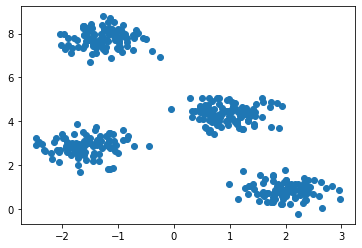

In [2]:
np.random.seed(1)
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.4, random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.show()

Now let's build a GMM on this dataset and see if it can correctly cluster the data.

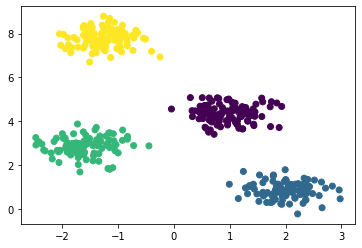

In [3]:
mixture = GaussianMixture(n_components=4).fit(X)
labels = mixture.predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

Nice! Now let's explore another usage of Gaussian Mixture Models: estimation of density. GMMs are not only used for clustering, the result they ultimately generate is a probabilistic model that describes the distribution of the dataset. First we should create some helper functions that assists in visualising the effect of using GMMs on a dataset.

In [4]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

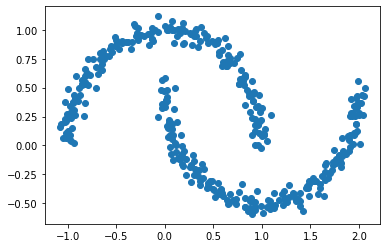

In [5]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=400, noise=0.05, random_state=0)

plt.scatter(Xm[:,0], Xm[:,1])
plt.show()

If we simply apply GMM with 2 clusters here, we will find that the results aren't very useful.

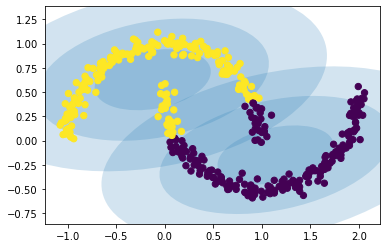

In [6]:
mixture = GaussianMixture(n_components=2, covariance_type='full').fit(Xm)
labels = mixture.predict(Xm)

plot_gmm(mixture, Xm)

However, if we were to increase the number of components and ignore the labels, we find that it is able to fit much better to the dataset.

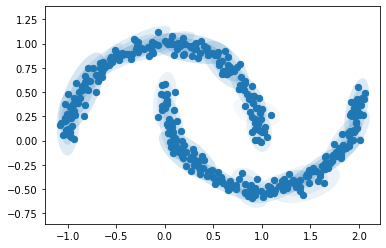

In [7]:
mixture = GaussianMixture(n_components=20, covariance_type='full').fit(Xm)

plot_gmm(mixture, Xm, label=False)

In this use case, Gaussian Mixture Model serves to model the overall distribution of data, rather than attempting to find clusters of data within the dataset. This means that GMM can be used to generate new data that will fit into the original dataset with similar distributions.